## Module 2: Fitting the Linear Model

### Step 0

Load the appropriate libraries and bring in the data. Note that we have to run a script to get the [California Housing dataset](https://scikit-learn.org/stable/modules/generated/sklearn.datasets.fetch_california_housing.html) to match as it is in scikit-learn. We cannot pull it directly from scikit-learn since CodeGrade cannot access the internet.

In [1]:
# CodeGrade step0

from sklearn.datasets import fetch_california_housing
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from scipy.stats import pearsonr
import os
import tarfile
import joblib # Import joblib directly
from sklearn.datasets._base import _pkl_filepath, get_data_home
import statsmodels.api as sm


archive_path = "cal_housing.tgz" # change the path if it's not in the current directory
data_home = get_data_home(data_home=None) # change data_home if you are not using ~/scikit_learn_data
if not os.path.exists(data_home):
    os.makedirs(data_home)
filepath = _pkl_filepath(data_home, 'cal_housing.pkz')

with tarfile.open(mode="r:gz", name=archive_path) as f:
    cal_housing = np.loadtxt(
        f.extractfile('CaliforniaHousing/cal_housing.data'),
        delimiter=',')
    # Columns are not in the same order compared to the previous
    # URL resource on lib.stat.cmu.edu
    columns_index = [8, 7, 2, 3, 4, 5, 6, 1, 0]
    cal_housing = cal_housing[:, columns_index]

    joblib.dump(cal_housing, filepath, compress=6) # Now using the directly imported joblib

# Load the dataset
california = fetch_california_housing(as_frame=True)
data = california.data
target = california.target

In [2]:
data.tail()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
20635,1.5603,25.0,5.045455,1.133333,845.0,2.560606,39.48,-121.09
20636,2.5568,18.0,6.114035,1.315789,356.0,3.122807,39.49,-121.21
20637,1.7000,17.0,5.205543,1.120092,1007.0,2.325635,39.43,-121.22
20638,1.8672,18.0,5.329513,1.171920,741.0,2.123209,39.43,-121.32
20639,2.3886,16.0,5.254717,1.162264,1387.0,2.616981,39.37,-121.24


In [3]:
target.head()

0    4.526
1    3.585
2    3.521
3    3.413
4    3.422
Name: MedHouseVal, dtype: float64

### Step 1

*   Create a copy of the data and call it `df`
*   Select the `X` variable to be `MedInc` and the `y` be `MedianHouseValue`

Return `X.shape, y.shape` to verify.

In [4]:
# CodeGrade step1
df = data.copy()

X = df[['MedInc']]
y = target

In [5]:
X.shape

(20640, 1)

In [6]:
y.shape

(20640,)

### Step 2

Using `statsmodels`


*   Add the constant term and call it `X_const`
*   fit the OLS model and call it `model`
*   extract the residuals and call them `residuals`
*   count the number of positive and negative residuals, calling them `positive_residuals` and `negative_residuals`, respectively

Return `positive_residuals, negative_residuals` to verify.

In [7]:
# CodeGrade step2

X_const = sm.add_constant(X)
model = sm.OLS(y, X_const).fit()  
residuals = model.resid

positive_residuals = (residuals <= 0).sum()
negative_residuals = (residuals >= 0).sum()

In [18]:
X_const.shape

(20640, 2)

In [8]:
positive_residuals

12265

In [9]:
negative_residuals

8375

In [10]:
negative_residuals + positive_residuals - residuals.count() # Checked !

0

### Code

Compute and return $r^2$, calling it `r_squared`.

In [11]:
# CodeGrade step3
r_squared = model.rsquared
r_squared

0.47344749180719903

In [ ]:
y_pred = model.predict(X_const)

In [12]:
ss_res = np.sum((y - y_pred) ** 2)             # Residual sum of squares
ss_tot = np.sum((y - np.mean(y)) ** 2)         # Total sum of squares

r_squared = 1 - (ss_res / ss_tot)
r_squared

0.47344749180719903

Plot the residual plot.

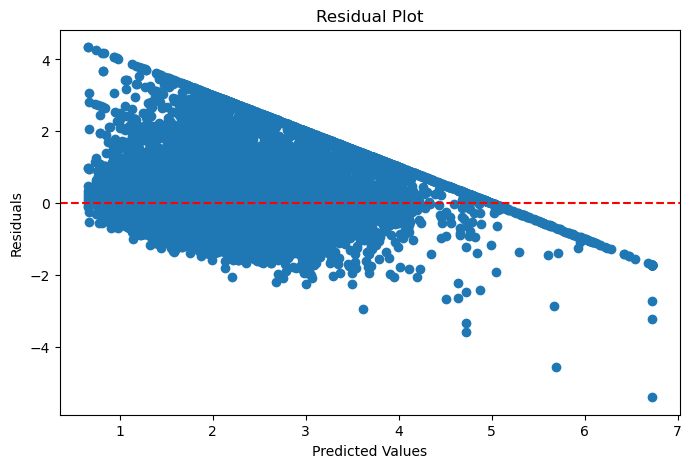

In [20]:
plt.figure(figsize=(8, 5))
plt.scatter(x=y_pred, y=residuals)
plt.axhline(0, color='red', linestyle='--')
plt.xlabel("Predicted Values")
plt.ylabel("Residuals")
plt.title("Residual Plot")
plt.show()

### Step 4

Compute Cook's distance, where the model's `get_influence` is called `influence` and the Cook's distance from this is called `cooks_d`.

Then identify the influential points, calling them `influential_points`. Verify this by returing `influential_points.shape`.

In [24]:
# CodeGrade step4
influence = model.get_influence()
cooks_d = influence.cooks_distance[0]
influence_points = np.where(cooks_d > 1)[0]
influence_points

array([], dtype=int64)

In [23]:
influence_points.shape

(0,)

Now plot Cook's Distance.

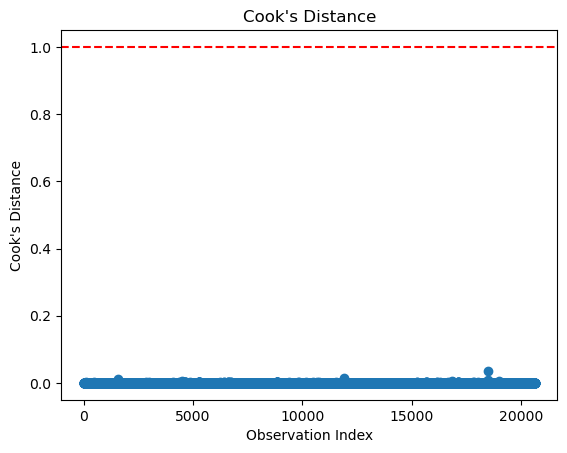

In [25]:
# Plot Cook's Distance

plt.stem(np.arange(len(cooks_d)), cooks_d, basefmt=" ")
plt.title("Cook's Distance")
plt.xlabel("Observation Index")
plt.ylabel("Cook's Distance")
plt.axhline(1, color='red', linestyle='--')  # Threshold line
plt.show()